# Introduction to geopandas GeoDataFrames

Now as we have learned how to create and represent geographic data in Python using shapely objects, we will continue and use [geopandas](https://geopandas.org/) [^geopandas] as our main tool for spatial data analysis in vector format. 

**Geopandas** is a Python library designed to make working with geospatial data in Python easier. It extends the datatypes used by pandas (which we covered in Part I) to allow geospatial operations on geometric types. Essentially, it provides a high-level interface for vector data (like points, lines, and polygons) that integrates well with the existing pandas framework, as well as the extensive Python GIS ecosystem (see Figure 5.1 in Chapter 5), making it easy to conduct spatial operations and analyses.

## GeoDataFrame data structures

The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas. This means that we can use many familiar methods from pandas also when working with geopandas and geograpchic data. A `GeoDataFrame` is basically a `pandas.DataFrame` that contains a dedicated column for storing geometries (see Figure 6.10). The geometry column is a `GeoSeries` which contains the geometries as shapely objects (points, lines, polygons, multipolygons etc.). 

![_**Figure 6.10**. Geometry column in a GeoDataFrame._](../img/geodataframe.png)

_**Figure 6.10**. Geometry column in a GeoDataFrame._

## Reading a file

Similarly as with `pandas`, a typical first step when starting to work with `geopandas` is to read data from a given file. In `geopandas`, we can use a generic function `.from_file()` for reading geospatial data from various data formats, such as the ones introduced in Chapter 5. In the data -folder, we have census data from Austin, Texas downloaded from the [U.S Census bureau](https://www.census.gov/programs-surveys/acs/data.html) [^us_census] which we will use to introduce some of the basic data input/output functionalities of `geopandas`. Let's start by defining the path to the file that we want to read into the memory: 

In [2]:
from pathlib import Path

data_folder = Path("data/Austin")
fp = data_folder / "austin_pop_2019.gpkg"
print(fp)

data/Austin/austin_pop_2019.gpkg


Similar to importing `pandas`, we will first import geopandas as `gpd` which allows us to start using the library. Then we will read the file by passing the filepath to `.read_file()` function of `geopandas`:

In [3]:
import geopandas as gpd

data = gpd.read_file(fp)

You can use the `.read_file()` command in this way to read data from many different vector formats (GeoPackage, Shapefile, GeoJSON, etc.). Hence, it is very easy to start working with geographic data using geopandas. Let's take a look at the data type of our `data` variable:

In [4]:
type(data)

geopandas.geodataframe.GeoDataFrame

Here we see that our `data` -variable is a `GeoDataFrame` which extends the functionalities of `DataFrame` to handle spatial data as discussed earlier. We can apply many familiar `pandas` methods to explore the contents of our `GeoDataFrame`. Let's have a closer look at the first rows of the data: 

In [5]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


We can see that there are three columns in our `GeoDataFrame`. The columns `pop2019` and `tract` represent attribute information in our data, namely the number of people living on a given census tract and a unique id-number for the tract, wherease the column `geometry` contains the geographic data (polygons) for each census tract.

It is always a good idea to explore your geographic data on a map. Creating a simple map from a `GeoDataFrame` is really easy. You can use the `.plot()` function from geopandas that creates a map based on the geometries of the data. `geopandas` actually uses `matplotlib` for plotting which we introduced in Part 1 of this book. Let's try it out, and do a quick visualization of our data.

<Axes: >

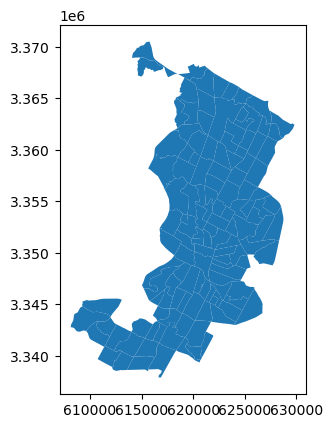

In [8]:
data.plot()

_**Figure 6.11**. Census tract polygons for Austin, Texas, USA._

Voilá! Now you have created your first map with geopandas! This map gives a quick overview of how the geometries of the cencus tracts are located in the given region. The `x` and `y` axes in the plot are based on the coordinate values of the geometries which are in this case represented as meters.

#### Question 6.2

Figure out the following information from our input data using your `pandas` skills:
    
- Number of rows?
- Number of census tracts (based on column `tract`)?
- Total population (based on column `pop2019`)?

In [6]:
# You can use this cell to enter your solution.

In [7]:
# Solution

print("Number of rows", len(data))
print("Number of census tract", data["tract"].nunique())
print("Total population", data["pop2019"].sum())

Number of rows 130
Number of census tract 130
Total population 611935.0


## Geometries in geopandas

As we saw from the previous example, a `GeoDataFrame` has one column for storing geometries. By default, `geopandas` looks for the geometries from a column called `geometry`, which is ultimately a `GeoSeries` data structure containing shapely geometric objects. Let's have a closer look at the geometry column of our data:

In [9]:
data["geometry"].head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.330 3...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

As we can see here,  the `geometry` column contains polygon geometries. The last line above reveals that the data type (`dtype`) of this column is `geometry`. Hence, in a similar manner as `pandas` can identify automatically that specific column contains e.g. integer values, geopandas has identified that the data type of a column containing `shapely.geometry` objects is `geometry`. As we learned earlier, the `shapely.geometry` objects have various useful attributes and methods that we can use to work with geographic data. Luckily for us, it is possible to use these shapely methods directly in geopandas and apply them to a whole `GeoSeries` without a need to access individual geometries one by one. With this in mind, let's proceed and calculate the area of each census tract polygon. Calculating an area of all geometries in your data can be done easily by using a command `.area` that comes with the `GeoDataFrame` object. As a reminder, the census data are in a metric coordinate reference system, so the area values will be given in square meters:

In [13]:
data["geometry"].area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

The same result can be achieved by using the syntax `data.area`. Let's convert the area values from square meters to square kilometers and store them into a new column called `area_km2`:

In [15]:
data["area_km2"] = data.area / 1000000
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3...",1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208


As we can see, now we added a new column into our `GeoDataFrame` which contains the area of each polygon as square kilometers. Now you have succesfully conducted your first geocomputational analysis in Python! Quite easy isn't it? We can also very easily visualize the data and make a nice choropleth map by using the area of a given geometry to determine the color for it. To do this, we can use the parameter `column` of the `.plot()` method in geopandas to specify that the color for each polygon should be based on the values stored in the `area_km2` column:  

<Axes: >

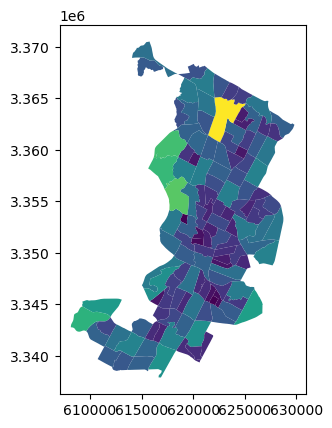

In [18]:
data.plot(column="area_km2")

As a result, we can more easily spot the larger polygons from the map with brighter colors. There are various ways to modify the appearance of the map and colors, which we will learn later in Chapter 8.

#### Question 6.3

Using your `pandas` skills, create a new column `pop_density_km2` and populate it with population density values (population / km2) calculated based on columns `pop2019` and `area_km2`. Print out answers to the following questions:

- What was the average population density in 2019?
- What was the maximum population density per census tract?

In [13]:
# Use this cell to enter your solution.

In [14]:
# Solution

# Calculate population density
data["pop_density_km2"] = data["pop2019"] / data["area_km2"]

# Print out average and maximum values
print("Average:", round(data["pop_density_km2"].mean()), "pop/km2")

print("Maximum:", round(data["pop_density_km2"].max()), "pop/km2")

Average: 2397 pop/km2
Maximum: 11324 pop/km2


## Writing data into a file

Similarly as reading data, writing the contents of your `GeoDataFrame` into a specific file is one of the most typical operations when working with geographic data. It is possible to export the `GeoDataFrame` into various data formats using the `.to_file()` method. Let's start by learning how we can write data into a `GeoPackage`. Before proceeding, let's see how the data looks like at this point:

In [19]:
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3...",1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208


Writing the contents of this `GeoDataFrame` into a file can be done by using the `.to_file()` method. To use the method, we only need to pass the filepath to the file into which the data will be written. Geopandas automatically identifies the correct format based on the file extension that have been written after the dot in the file path. I.e. in the example below, the text `.gpkg` determines that the `GeoDataFrame` will be written in `GeoPackage` format:

In [21]:
# Create a output path for the data
output_fp = data_folder / "austin_pop_density_2019.gpkg"

# Write the file
data.to_file(output_fp)

Now we have successfully stored the data into a file called `austin_pop_density_2019.gpkg`. Notice, that if you have an existing file with the same name, geopandas will automatically overwrite the contents (without asking). Hence, it is good to be a bit mindful about the naming of the files whenever writing data to disk. 

#### Question 6.4

Read the output file using `geopandas` and check that the data looks ok.

In [17]:
# Use this cell to enter your solution.

In [25]:
# Solution

temp = gpd.read_file(output_fp)

# Check first rows
temp.head()

# You can also plot the data for a visual check by uncommenting the following
# temp.plot()

,pop2019,tract,area_km2,geometry
0,6070.0,002422,4.029772,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,1.532030,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,7419.0,002411,3.960344,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,2.181762,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,2.431208,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


## Preparing GeoDataFrames from different file formats

Reading data into Python is usually the first step of an analysis workflow. There are various different GIS data formats available such as [Shapefile](https://en.wikipedia.org/wiki/Shapefile) [^shp], [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) [^GeoJson], [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) [^KML], and [GeoPackage](https://en.wikipedia.org/wiki/GeoPackage) [^GPKG]. Geopandas is capable of reading data from all of these formats (plus many more). 

This tutorial will show some typical examples how to read (and write) data from different sources. The main point in this section is to demonstrate the basic syntax for reading and writing data using short code snippets. You can find the example data sets in the data-folder. However, most of the example databases do not exists, but you can use and modify the example syntax according to your own setup.

### Reading vector data

In `geopandas`, we can use a generic function `.from_file()` for reading in various vector data formats. When reading files with `geopandas`, the data are passed on to the `fiona` library under the hood for reading the data. This means that you can read and write all data formats supported by `fiona` with `geopandas`. 

In [20]:
import geopandas as gpd
import fiona

Let's check which drivers are supported by `fiona`.

In [21]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In the list of supported drivers, `r` is for file formats `fiona` can read, and `w` is for file formats it can write. Letter `a` marks formats for which `fiona` can append new data to existing files.

Let's read in some sample data to see the basic syntax.

In [52]:
# Read Esri Shapefile
fp = data_folder / "austin_pop_2019.shp"
data = gpd.read_file(fp)
data.head()

,fid,pop2019,tract,geometry
0,1.0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2.0,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,3.0,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4.0,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,5.0,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


The same syntax works for other commong vector data formats. 

In [23]:
# Read file from Geopackage
fp = "data/Austin/austin_pop_2019.gpkg"
data = gpd.read_file(fp)

# Read file from GeoJSON
fp = "data/Austin/austin_pop_2019.geojson"
data = gpd.read_file(fp)

# Read file from MapInfo Tab
fp = "data/Austin/austin_pop_2019.tab"
data = gpd.read_file(fp)

Some file formats such as GeoPackage may contain multiple layers with different names which can be speficied using the `layer` -parameter. Our example geopackage file has only one layer with the same name as the file, so we don't actually need to specify it to read in the data.

In [47]:
# Read spesific layer from Geopackage
fp = "data/Austin/austin_pop_2019.gpkg"
data = gpd.read_file(fp, layer="austin_pop_2019")

### TODO:(write intro about enabling additional drivers and reading in the KML file)

In [42]:
# Enable KML driver
gpd.io.file.fiona.drvsupport.supported_drivers["LIBKML"] = "rw"

# Read file from KML
fp = "data/Austin/austin_pop_2019.kml"
data = gpd.read_file(fp)

### TODO: Write more details about Zipfile reading

Lastly, it is also useful to know how to read data directly from a Zipfile. The following example shows how to do that:

In [43]:
from zipfile import ZipFile
import io


def read_gdf_from_zip(zip_fp):
    """
    Reads a spatial dataset from ZipFile into GeoPandas. Assumes that there is only a single file (such as GeoPackage)
    inside the ZipFile.
    """
    with ZipFile(zip_fp) as z:
        # Lists all files inside the ZipFile, here assumes that there is only a single file inside
        layer = z.namelist()[0]
        data = gpd.read_file(io.BytesIO(z.read(layer)))
    return data


# Read the data
buildings = read_gdf_from_zip("data/Helsinki/building_points_helsinki.zip")

### Writing vector data

We can save spatial data to various vector data formats using the `.to_file()` function in `geopandas` which also relies on `fiona`. It is possible to specify the output file format using the `driver` parameter, however, for most file formats it is not needed as the tool is able to infer the driver from the file extension. 

In [50]:
# Write to Shapefile (just make a copy)
outfp = "data/Temp/austin_pop_2019.shp"
data.to_file(outfp)

# Write to Geopackage (just make a copy)
outfp = "data/Temp/austin_pop_2019.gpkg"
data.to_file(outfp, driver="GPKG")

# Write to GeoJSON (just make a copy)
outfp = "data/Temp/austin_pop_2019.geojson"
data.to_file(outfp, driver="GeoJSON")

# Write to MapInfo Tab (just make a copy)
outfp = "data/Temp/austin_pop_2019.tab"
data.to_file(outfp)

# Write to KML (just make a copy)
outfp = "data/Temp/austin_pop_2019.kml"
data.to_file(outfp, driver="KML")

## Creating a GeoDataFrame from scratch

It is possible to create spatial data from scratch by using `shapely`'s geometric objects and `geopandas`. This is useful as it makes it easy to convert, for example, a text file that contains coordinates into spatial data layers. Let's first try creating a simple `GeoDataFrame` based on coordinate information that represents the outlines of the [Senate square in Helsinki, Finland](https://fi.wikipedia.org/wiki/Senaatintori). Here are the coordinates based on which we can create a `Polygon` object using `shapely.

In [29]:
from shapely.geometry import Polygon

# Coordinates of the Helsinki Senate square in decimal degrees
coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

Now we can use this polygon and `geopandas` to create a `GeoDataFrame` from scratch. The data can be passed in as a list-like object. In our case we will only have one row and one column of data. We can pass the polygon inside a list, and name the column as `geometry` so that `geopandas` will use the contents of that column the geometry column. Additionally, we could define the coordinate reference system for the data, but we will skip this step for now. For details of the syntax, see documentation for the `DataFrame` constructor and `GeoDataFrame` constructor online.

In [30]:
newdata = gpd.GeoDataFrame(data=[poly], columns=["geometry"])

In [31]:
newdata

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


We can also add additional attribute information to a new column. 

In [32]:
# Add a new column and insert data
newdata.at[0, "name"] = "Senate Square"

# Check the contents
newdata

/tmp/ipykernel_125320/3241937378.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Senate Square' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  newdata.at[0, "name"] = "Senate Square"


,geometry,name
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senate Square


There it is! Now we have two columns in our data; one representing the geometry and another with additional attribute information. From here, you could proceed into adding additional rows of data, or printing out the data to a file. 

## Creating a GeoDataFrame from a text file

A common case is to have coordinates in a delimited textfile that needs to be converted into spatial data. We can make use of `pandas`, `geopandas` and `shapely` for doing this. 

The example data contains point coordinates of airports derived from [openflights.org](https://openflights.org/data.html) [^openflights]. Let's read in a couple of useful columns from the data for further processing.

In [33]:
import pandas as pd

In [34]:
airports = pd.read_csv(
    "data/Airports/airports.txt",
    usecols=["Airport ID", "Name", "City", "Country", "Latitude", "Longitude"],
)

In [35]:
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001


In [36]:
len(airports)

7698

There are over 7000 airports in the data and we can use the coordinate information available in the `Latitude` and `Longitude` columns for visualizing them on a map. The coordinates are stored as *{term}`Decimal degrees <Decimal degrees>`*, meaning that the appropriate coordinate reference system for these data is WGS 84 (EPSG:4326).  

There is a handy tool in `geopandas` for generating an array of `Point`objects based on x and y coordinates called `.points_from_xy()`. The tool assumes that x coordinates represent longitude and that y coordinates represent latitude. 

In [37]:
airports["geometry"] = gpd.points_from_xy(
    x=airports["Longitude"], y=airports["Latitude"], crs="EPSG:4326"
)

airports = gpd.GeoDataFrame(airports)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,POINT (145.39200 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001,POINT (145.78900 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005,POINT (144.29601 -5.82679)
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977,POINT (146.72598 -6.56980)
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001,POINT (147.22000 -9.44338)


Now we have the point geometries as `shapely`objects in the geometry-column ready to be plotted on a map.

<Axes: >

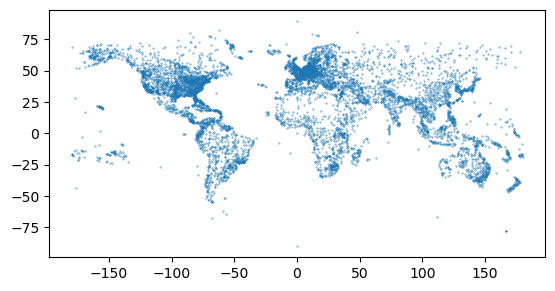

In [38]:
airports.plot(markersize=0.1)

_**Figure 6.12**. A basic plot showing the airports from openflights.org._

## Footnotes

[^GeoJson]: <https://en.wikipedia.org/wiki/GeoJSON>
[^geopandas]: <https://geopandas.org/>
[^GPKG]: <https://en.wikipedia.org/wiki/GeoPackage>
[^KML]: <https://en.wikipedia.org/wiki/Keyhole_Markup_Language>
[^NLS_topodata]: <https://www.maanmittauslaitos.fi/en/maps-and-spatial-data/expert-users/product-descriptions/topographic-database>
[^NLS_lisence]: <https://www.maanmittauslaitos.fi/en/opendata-licence-cc40>
[^OGC_sfa]: <https://www.ogc.org/standards/sfa>
[^openflights]: <https://openflights.org/data.html>
[^paituli]: <https://avaa.tdata.fi/web/paituli/latauspalvelu>
[^shp]: <https://en.wikipedia.org/wiki/Shapefile> 
[^topodata_fair]: <https://etsin.fairdata.fi/dataset/5023ecc7-914a-4494-9e32-d0a39d3b56ae>
[^us_census]: <https://www.census.gov/programs-surveys/acs/data.html>